In [1]:
import cv2
print(cv2.__version__)

3.4.2


In [2]:
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Split MP4 Video into Individual Frames

In [3]:
try:
    if not os.path.exists('frames'):
        os.makedirs('frames')
except OSError:
    print('Error: Creating directory of frames')

In [4]:
vidcap = cv2.VideoCapture('Splitting_Video_into_Images.mp4')
frame_no = 0
success, image = vidcap.read()
while success:
    name = './frames/frame' + str(frame_no) + '.jpg'
    cv2.imwrite(name, image)
    success, image = vidcap.read()
    frame_no += 1
vidcap.release() #closes video file or capturing device

### Split MP4 Video into Individual Frames (1 Frame per Second)

In [34]:
try:
    if not os.path.exists('frames_1ps'):
        os.makedirs('frames_1ps')
except OSError:
    print('Error: Creating directory of frames')

In [35]:
vidcap = cv2.VideoCapture('Splitting_Video_into_Images.mp4')
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
frame_no = 0
success, image = vidcap.read()
while success:
    if frame_no % fps == 0:
        name = './frames_1ps/frame' + str(frame_no // fps) + '.jpg'
        cv2.imwrite(name, image)
    success, image = vidcap.read()
    frame_no += 1
vidcap.release() #closes video file or capturing device

### Split MP4 Video into Individual Frames (1 Frame per Second & Limited Time Frame)

In [36]:
try:
    if not os.path.exists('frames_lmtd'):
        os.makedirs('frames_lmtd')
except OSError:
    print('Error: Creating directory of frames')

In [40]:
vidcap = cv2.VideoCapture('Splitting_Video_into_Images.mp4')
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
frame_no = 0
stop_time_ms = 42000
success, image = vidcap.read()
while success and vidcap.get(cv2.CAP_PROP_POS_MSEC) <= stop_time_ms:
    if frame_no % fps == 0:
        name = './frames_lmtd/frame' + str(frame_no // fps) + '.jpg'
        cv2.imwrite(name, image)
    success, image = vidcap.read()
    frame_no += 1
vidcap.release() #closes video file or capturing device

### Crop and OCR Individual Frames

In [6]:
from PIL import Image
import pytesseract

In [45]:
print(pytesseract.get_tesseract_version())

4.0.0


In [15]:
def crop_box(input_image):
    crop_width = 290
    crop_height = 220
    width, height = input_image.size
    #box coordinates: x, y of upper left corner, then x, y of lower right corner
    #0, 0 coordinates are upper left corner
    box = 0, height - crop_height, crop_width, height
    return input_image.crop(box)

In [22]:
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = Image.open(indir + filename)
        region = crop_box(im)
        text = pytesseract.image_to_string(region, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

PBZ le) arson
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 25 M
HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

PR le) ar
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF COL

### Convert all non-white pixels to black

In [3]:
img = cv2.imread('./frames_lmtd/frame32.jpg')
img[np.where((img != [255,255,255]).all(axis=2))] = [0,0,0]

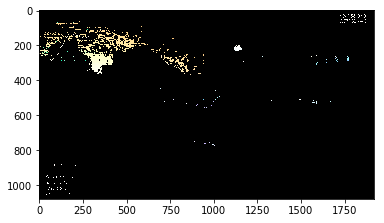

In [5]:
plt.imshow(img)
plt.show()

### Apply Pre-processing on Images to Improve OCR Output

In [27]:
#CONVERT IMAGE TO GRAYSCALE
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        text = pytesseract.image_to_string(region, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

PRY le) arse
HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

PRY le) arse
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

PR le) and
HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

PR le) ar
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF COLUMBIA

EL

### Scale (Enlarge) Images

In [43]:
#SCALE (ZOOM IN)
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        new_im = cv2.resize(region, (2*crop_height,2*crop_width), interpolation = cv2.INTER_LINEAR)
        text = pytesseract.image_to_string(new_im, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

Pan PAL
HEADING: 127° (T)
eek AT
ae
###################frame47.jpg###################
DISTRICT OF COLUMBIA

Pan VO PAL
HEADING: 127° (T)
eek AL

1 ae ROL
###################frame45.jpg###################
DISTRICT OF COLUMBIA

an VO PAL
HEADING: 127° (T)
eek AL
1 YAEL
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ROLL
aC
We RAL
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

AOL
HEADING: 130° (1)
ek AL
USI
###################frame41.jpg###################
DISTRICT OF COLUMBIA

an
2s) Ra)
ae RAL
eae RU
###################frame43.jpg###################
DISTRICT OF COLUMBIA

Pan VAL
HEADING: 131° (T)
ae RAL
Ue SU
###################frame42.jpg###################
DISTRICT OF COLUMBIA

an
HEADING: 131° (T)
ae RAL
ae SU
###################frame19.jpg###################

###################frame25.jpg###################
DISTRICT OF COLUMBIA

an Pa
i/o Pasi)

### Apply dilation and erosion to remove the noise

In [34]:
indir = './frames_lmtd/'
kernel = np.ones((1,1), np.uint8)
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        new_im = cv2.dilate(region, kernel, iterations=1)
        new_im = cv2.erode(new_im, kernel, iterations=1)
        text = pytesseract.image_to_string(new_im, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

PRY le) arse
HEADING: 127° (T)
PIE KEL]
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

PBZ le) arson
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 127° (T)
DATE: 5/3/18
TIME: 5:54:23 AM
###################frame44.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 130° (T)
DATE: 5/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 25 M
HEADING: 130° (T)
PoE EL]
TIME: 5:54:03 AM
###################frame41.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 25 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:07 AM
###################frame43.jpg###################
DISTRICT OF COLUMBIA

ELEVATION: 26 M
HEADING: 131° (T)
DATE: 5/3/18
TIME: 5:54:15 AM
###################frame42.jpg###################
DISTRICT OF 

### Apply Filters and Binarization

In [40]:
indir = './frames_lmtd/'
for root, dirs, filenames in os.walk(indir):
    for filename in filenames:
        print('###################' + filename + '###################')
        im = cv2.imread(indir + filename)
        height, width = im.shape[:2]
        crop_width = 290
        crop_height = 220
        region = im[height-crop_height:height,0:crop_width].copy()
        region = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
        new_im = cv2.threshold(cv2.GaussianBlur(region, (5,5), 0), 250, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        text = pytesseract.image_to_string(new_im, lang='eng')
        print(text)

###################frame46.jpg###################
DISTRICT OF COLUMBIA

p20 ie re
ee Cer emer
pei oe cal)
TIME: 5:54:27 AM
###################frame47.jpg###################
DISTRICT OF COLUMBIA

cE e re
ee) Cer am ee]
pee cal
TIME: 5:54:31 AM
###################frame45.jpg###################
DISTRICT OF COLUMBIA

p57 ie re
a wel cer iam ee]
peat al]

Ri See ET
###################frame44.jpg###################
OISTRICT OF COLUMBIA

po E Sie re
HEADING: 130° (T)
DATE: 8/3/18
TIME: 5:54:19 AM
###################frame40.jpg###################
DISTRICT OF COLUMBIA

fatale en
HEADING: 130° (1)
ae aL)
by eer]
###################frame41.jpg###################
DISTRICT OF COLUMBIA

poe 2
ee CK ae)
pee al

Bi See wT
###################frame43.jpg###################
DISTRICT OF COLUMBIA

poE SE e re
HEADING: 131° (1)
peor)

Pi See ET
###################frame42.jpg###################
DISTRICT OF COLUMBIA

poe 2
HEADING: 131° (1)
ev ae al
Ph See SE
###################frame19.jpg###################
